<a href="https://colab.research.google.com/github/vitorinojuliano/titanic/blob/main/S1_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Fazendo upload da minha base de dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


* Importando Bibliotecas relevantes e conectando meu dataset

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dados = pd.read_csv("train.csv")

* Visualizando as três primeiras linhas

In [ ]:
dados.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**EDA - Análise Exploratória Inicial**


1.   Informações básicas sobre meu dataset



In [ ]:
print("Formato: ",dados.shape,"\n")
print("Info Colunas e Tipos: ")
dados.info()

Formato:  (891, 12) 

Info Colunas e Tipos: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Estátisticas do dataseet
dados.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
print("\n Cardinalidade para colunas Categóricas: ")
print("Sexo:", dados['Sex'].unique())
print("Embarcado:", dados['Embarked'].unique())
print("Classe:", dados['Pclass'].unique())


 Cardinalidade para colunas Categóricas: 
Sexo: ['male' 'female']
Embarcado: ['S' 'C' 'Q' nan]
Classe: [3 1 2]



2.   Identificação de problemas nos dados



In [ ]:
print("Valores ausentes por coluna: ",dados.isnull().sum())

Valores ausentes por coluna:  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Problemas:**

*   Idade tem quase 20% de dados ausentes
*   Numero da cabine tem a maioria dos dados ausentes
*   Embarcados tem apenas dois valores ausentes



3. Tratamento de valores ausentes


In [ ]:
# IDADE - Preenchendo com a media
dados['Age'] = dados['Age'].fillna(dados['Age'].mean())

In [ ]:
# CABINE - Criando uma nova coluna que indica com 1 ou 0 se o passageiro tem informação da cabine registrada e remove a coluna original Cabin.
dados['Has_Cabin'] = dados['Cabin'].notna().astype(int)
dados.drop(columns='Cabin', inplace=True)

In [ ]:
# EMBARCADO - Preenchedo com o valor mais frequente (moda)
dados['Embarked'] = dados['Embarked'].fillna(dados['Embarked'].mode()[0])

In [ ]:
dados.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


4. Normalização e Padronização

In [ ]:
# Achando colunas numericas
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(colunas_numericas)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']


In [ ]:
# Colunas relevantes
colunas_numericas = ['Age','Fare']
# Padronizando
scaler = StandardScaler()
dados_padronizados = dados.copy()
dados_padronizados[colunas_numericas] = scaler.fit_transform(dados_padronizados[colunas_numericas])
# Visualizar dados padronizados
print("\n Dados Padronizados:")
print(dados_padronizados[colunas_numericas].head())


 Dados Padronizados:
        Age      Fare
0 -0.534891 -0.502445
1  0.668392  0.786845
2 -0.234070 -0.488854
3  0.442776  0.420730
4  0.442776 -0.486337


In [ ]:
# Normalizando
minmax = MinMaxScaler()
dados_normalizados = dados.copy()
dados_normalizados[colunas_numericas] = minmax.fit_transform(dados_normalizados[colunas_numericas])
#visualizar dados normalizados
print("\n Dados Normalizados:")
print(dados_normalizados[colunas_numericas].head())


 Dados Normalizados:
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


5. One-Hot Encoding para Variáveis Categóricas

In [ ]:
# Selecionando colunas categóricas
colunas_categoricas = ['Sex', 'Embarked', 'Pclass']
# Aplicando one-hot encoding
dados_codificados = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

print("\n Dataset depois do one-hot encoding")
dados_codificados.head()


 Dataset depois do one-hot encoding


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Has_Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,True,False,True,False,True


6. Visualização de Dados para Insights

In [ ]:
dados['Survived_label'] = dados['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})
dados['Sex'] = dados['Sex'].map({'male': 'Masculino', 'female': 'Feminino'})
dados['Classe'] = dados['Pclass'].map({1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'})

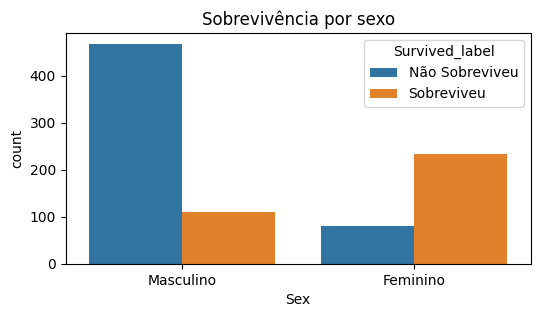

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='Sex', hue='Survived_label', data=dados)
plt.title("Sobrevivência por sexo")
plt.show()

Insight:
*    Mulheres tiveram maior taxa de sobrevivência



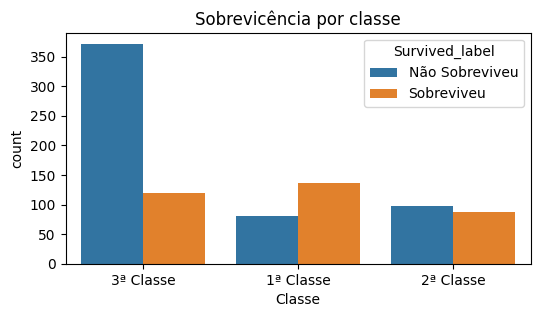

In [ ]:
plt.figure(figsize=(6,3))
sns.countplot(x='Classe', hue='Survived_label', data=dados)
plt.title("Sobrevicência por classe")
plt.show()

Insight:
*  Passageiros de 1ª classe tiveram maior taxa de sobrevivência

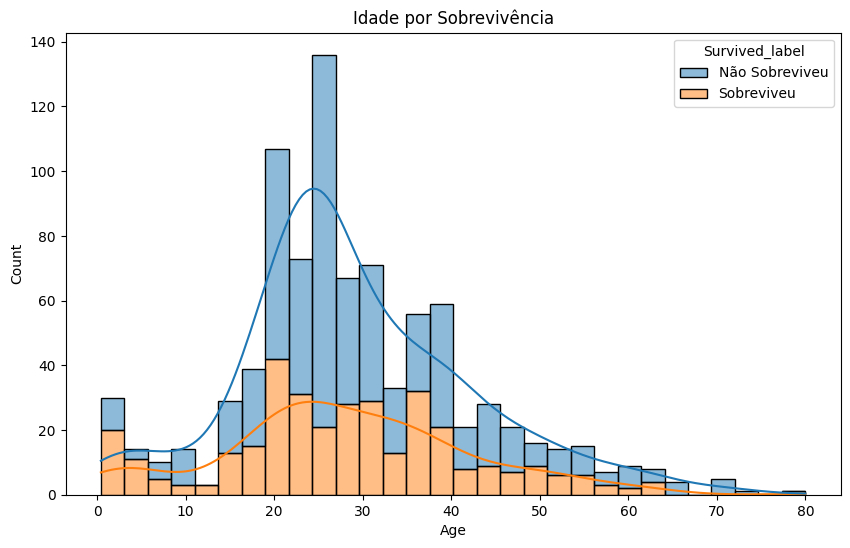

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=dados, x='Age', hue='Survived_label', bins=30, kde=True, multiple='stack')
plt.title("Idade por Sobrevivência")
plt.show()

Insight:
* Crianças abaixo de 10 anos, tiveram maior taxa de sobrevivência

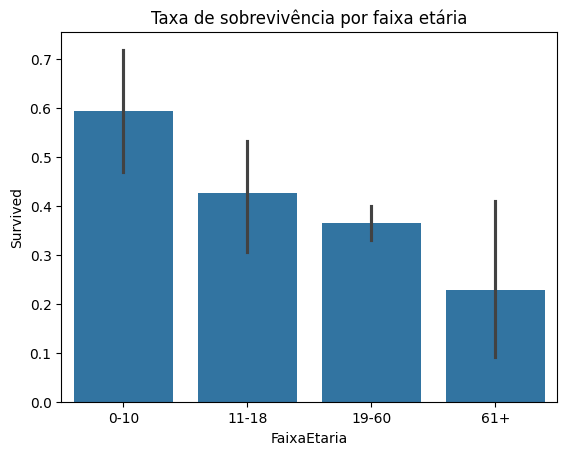

In [ ]:
dados['FaixaEtaria'] = pd.cut(dados['Age'], bins=[0, 10, 18, 60, 100], labels=['0-10', '11-18', '19-60', '61+'])
sns.barplot(x='FaixaEtaria', y='Survived', data=dados)
plt.title("Taxa de sobrevivência por faixa etária")
plt.show()